In [1]:
import pandas as pd
import numpy as np
import shared
import json


ve_or_ju = "ve"

In [2]:
history = pd.read_csv(f'data/grouped_paces_{ve_or_ju}.tsv', delimiter="\t")
history.head()

,mean_team_id,teams,name,num_runs,num_valid_times,mean_pace,stdev,log_stdev,most_common_leg,most_common_country,pace_1,pace_2,pace_3,pace_4,pace_5,pace_6,pace_7,pace_8
0,14.5,STORA TUNA OK,anna mårsell,4,4,6.6108,0.3563,0.0526,1,SWE,6.441,7.214,6.291,6.497,NaN,NaN,NaN,NaN
1,27.0,IFK MORAS OK;STORA TUNA OK,magdalena olsson,7,7,7.1139,0.5656,0.0824,2,SWE,6.511,7.381,7.676,7.710,6.062,7.234,7.223,NaN
2,3.0,STORA TUNA OK,julia jakob,1,1,5.9440,0.0000,0.0000,3,SWE,5.944,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.0,STORA TUNA OK,tove alexandersson,7,7,6.0373,0.3487,0.0565,4,SWE,5.711,6.042,6.289,6.008,5.672,6.738,5.801,NaN
4,61.0,GÖTEBORG MAJORNA OK;EKSJÖ SOK,lisa holer,4,3,7.3283,0.8452,0.1119,4,SWE,6.567,6.911,8.507,NaN,NaN,NaN,NaN,NaN


In [3]:
history.sort_values(by="num_runs").tail(30)

,mean_team_id,teams,name,num_runs,num_valid_times,mean_pace,stdev,log_stdev,most_common_leg,most_common_country,pace_1,pace_2,pace_3,pace_4,pace_5,pace_6,pace_7,pace_8
4439,698.5,EPILÄN ESA;KANGASALA SK,liisa rajalampi,8,8,11.3311,1.1712,0.1061,1,FIN,11.532,13.396,11.485,11.062,12.275,9.024,11.095,10.780
4441,817.0,EPILÄN ESA,marja-liisa ruusunen,8,7,12.9151,1.6235,0.1272,2,FIN,12.827,12.556,11.497,15.007,10.317,13.014,15.188,NaN
2425,680.0,KOKKOLAN SUUNNISTAJAT,henna virkkala,8,8,11.7154,1.6460,0.1456,3,FIN,9.667,10.236,13.573,12.247,13.516,9.212,13.056,12.216
3486,654.0,ETELÄ-KYMEN SUUNNISTAJAT;INKEROISTEN TERHO;GAU...,tarja liikanen,8,8,14.3664,1.0639,0.0745,4,FIN,12.873,14.713,14.432,14.843,16.054,12.944,15.415,13.657
4428,613.0,KAUSTISEN POHJAN-VEIKOT,sini mattila,8,8,11.7636,1.4515,0.1311,3,FIN,11.694,12.841,13.097,10.794,12.964,8.860,13.163,10.696
3517,778.5,MULON MANTAT,minna rokkila,8,8,13.5134,2.0066,0.1499,3,FIN,13.720,16.432,11.702,13.513,16.435,10.272,13.662,12.371
2375,527.0,SAVON SUUNTA;KUOPION POLIISI-URHEILIJAT,satu seppä,8,8,11.5156,2.1048,0.1730,2,FIN,8.992,12.889,11.679,10.786,11.396,16.128,10.989,9.266
2366,342.0,LUUMÄEN RASTI,anni inkilä:LUUMÄEN RASTI,8,8,8.4181,0.5121,0.0609,1,FIN,8.312,8.487,7.756,7.817,8.902,7.949,9.088,9.034
1043,324.5,GANDDAL IL,aud taksdal,8,8,8.4261,0.8685,0.1017,4,NOR,8.494,8.704,7.993,7.285,9.975,7.441,9.419,8.098
1041,324.5,GANDDAL IL,trine bolstad,8,7,10.4540,1.3727,0.1232,2,NOR,8.785,9.859,10.602,9.636,10.183,10.616,13.497,NaN


In [4]:
# HISTORY: ""mean_team_id"	"teams"	"name"	"num_runs"	"num_valid_times"	"mean_pace"	"stdev"	"most_common_leg"	"most_common_country"	
# "pace_1"	"pace_2"	"pace_3"	"pace_4"	"pace_5"	"pace_6"	"pace_7"
# RUNS: "team"	"team_country"	"pace"	"leg_nro"	"num_runs"
history["leg_nro"] = history["most_common_leg"]
history["team_id"] = history["mean_team_id"]
history["team_country"] = history["most_common_country"]






In [5]:
(top_countries, top_first_names) = shared.read_persisted_dummy_column_values(ve_or_ju)

In [6]:
features = shared.preprocess_features(history, top_countries, ve_or_ju)
features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15019 entries, 0 to 15018
Data columns (total 21 columns):
mean_team_id           15019 non-null float64
teams                  15019 non-null object
name                   15019 non-null object
num_runs               15019 non-null int64
num_valid_times        15019 non-null int64
mean_pace              14600 non-null float64
stdev                  14600 non-null float64
log_stdev              15019 non-null float64
most_common_leg        15019 non-null int64
most_common_country    15019 non-null object
pace_1                 14600 non-null float64
pace_2                 8344 non-null float64
pace_3                 5957 non-null float64
pace_4                 4225 non-null float64
pace_5                 3038 non-null float64
pace_6                 2051 non-null float64
pace_7                 1223 non-null float64
pace_8                 463 non-null float64
leg_nro                15019 non-null int64
team_id                15019 non-nul

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 4 columns):
first_name           974 non-null object
mean_pace_count      975 non-null int64
fn_pace_class        975 non-null int64
fn_pace_std_class    975 non-null int64
dtypes: int64(3), object(1)
memory usage: 30.6+ KB


None

[]

,team_id,team_id_log10,team_id_square,leg_1,leg_2,leg_3,leg_4,c_EST,c_FIN,c_GBR,...,fn_pace_class_6.0,fn_pace_class_7.0,fn_pace_class_8.0,fn_pace_class_9.0,fn_pace_class_nan,fn_pace_std_class_0.0,fn_pace_std_class_1.0,fn_pace_std_class_2.0,fn_pace_std_class_3.0,fn_pace_std_class_nan
0,14.5,1.161368,210.25,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,27.0,1.431364,729.00,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3.0,0.477121,9.00,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,10.0,1.000000,100.00,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,61.0,1.785330,3721.00,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15014,329.0,2.517196,108241.00,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
15015,295.0,2.469822,87025.00,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
15016,212.0,2.326336,44944.00,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
15017,212.0,2.326336,44944.00,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [7]:
features.shape

(15019, 41)

In [8]:
gbr_sd_estimate = shared.predict_without_history(features, ve_or_ju)


,log_q_low,predicted,log_q_high,log_std
0,1.844,6.952,2.043,0.100
1,1.858,6.929,2.076,0.109
2,1.796,7.127,2.110,0.157
3,1.806,6.927,2.046,0.120
4,1.932,7.984,2.144,0.106
5,1.819,6.723,2.039,0.110
6,1.833,7.058,2.060,0.114
7,1.826,6.728,2.016,0.095
8,1.852,6.860,2.009,0.078
9,1.863,7.041,2.102,0.119


0.17930748029502808

In [9]:
#history['prior_mean'] = np.exp(pmlearn_preds[0])
#history['prior_std'] = np.exp(pmlearn_preds[1])
history['prior_mean'] = gbr_sd_estimate["predicted"]
history['prior_log_std'] = gbr_sd_estimate["log_std"]


In [10]:
history['prior_mean_error'] = np.abs(history['prior_mean'] - history['mean_pace'])
display(f"prior_mean_error mean: {np.mean(history['prior_mean_error']).round(4)}")
history['prior_mean_error_in_sd'] = history['prior_mean_error'] / np.exp(history['prior_log_std'])
display(f"prior_mean_error_in_sd mean: {np.mean(history['prior_mean_error_in_sd']).round(4)}")


'prior_mean_error mean: 1.4465'

'prior_mean_error_in_sd mean: 1.1942'

In [11]:
history.head(5)

,mean_team_id,teams,name,num_runs,num_valid_times,mean_pace,stdev,log_stdev,most_common_leg,most_common_country,...,pace_6,pace_7,pace_8,leg_nro,team_id,team_country,prior_mean,prior_log_std,prior_mean_error,prior_mean_error_in_sd
0,14.5,STORA TUNA OK,anna mårsell,4,4,6.6108,0.3563,0.0526,1,SWE,...,NaN,NaN,NaN,1,14.5,SWE,6.951566,0.099555,0.340766,0.308475
1,27.0,IFK MORAS OK;STORA TUNA OK,magdalena olsson,7,7,7.1139,0.5656,0.0824,2,SWE,...,7.234,7.223,NaN,2,27.0,SWE,6.928611,0.108790,0.185289,0.166189
2,3.0,STORA TUNA OK,julia jakob,1,1,5.9440,0.0000,0.0000,3,SWE,...,NaN,NaN,NaN,3,3.0,SWE,7.126780,0.156963,1.182780,1.010965
3,10.0,STORA TUNA OK,tove alexandersson,7,7,6.0373,0.3487,0.0565,4,SWE,...,6.738,5.801,NaN,4,10.0,SWE,6.927193,0.120011,0.889893,0.789256
4,61.0,GÖTEBORG MAJORNA OK;EKSJÖ SOK,lisa holer,4,3,7.3283,0.8452,0.1119,4,SWE,...,NaN,NaN,NaN,4,61.0,SWE,7.984455,0.106071,0.656155,0.590120


In [12]:
log_stdev = np.nanstd(np.log(history[shared.pace_columns]), axis=1)
log_mean = np.nanmean(np.log(history[shared.pace_columns]), axis=1)
history["log_stdev"] = log_stdev
history["log_mean"] = log_mean
history[["stdev", "log_stdev", "prior_log_std"]].describe(percentiles=[0.05, .25, .5, .75, .95, .99])

/Users/oskari/.virtualenvs/jukola-xml-model-PGRmw6ze/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/oskari/.virtualenvs/jukola-xml-model-PGRmw6ze/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


,stdev,log_stdev,prior_log_std
count,14600.000000,14600.000000,15019.000000
mean,0.662892,0.056649,0.179307
std,0.837453,0.063487,0.034455
min,0.000000,0.000000,0.041521
5%,0.000000,0.000000,0.121596
25%,0.000000,0.000000,0.155779
50%,0.393700,0.038528,0.179183
75%,1.115100,0.103492,0.203186
95%,2.163425,0.168306,0.234423
99%,3.483041,0.232210,0.255494


In [13]:
history[['num_valid_times', "stdev", "prior_mean_error", "log_stdev", "prior_log_std", "prior_mean_error_in_sd"]].groupby('num_valid_times').agg("mean").round(2)


,stdev,prior_mean_error,log_stdev,prior_log_std,prior_mean_error_in_sd
num_valid_times,,,,,
0,NaN,NaN,NaN,0.20,NaN
1,0.00,1.82,0.00,0.19,1.49
2,0.95,1.56,0.08,0.18,1.29
3,1.18,1.23,0.10,0.18,1.03
4,1.27,1.11,0.11,0.17,0.93
5,1.30,0.97,0.11,0.16,0.82
6,1.28,0.86,0.11,0.15,0.73
7,1.26,0.75,0.11,0.15,0.64
8,1.19,0.69,0.11,0.15,0.59


In [14]:
history["predicted_log_pace_mean"] = history["log_mean"]
history["predicted_log_pace_std"] = history["log_stdev"]

simple_preds = history[
    ["mean_team_id", "num_valid_times", "mean_pace", "stdev", "log_stdev", "prior_mean", "prior_log_std", 
     "predicted_log_pace_mean", "predicted_log_pace_std", "name", "teams"]].round(4)
simple_preds.to_csv(f"data/simple_preds_for_runners_with_history_14062019_{ve_or_ju}.csv", sep='\t')


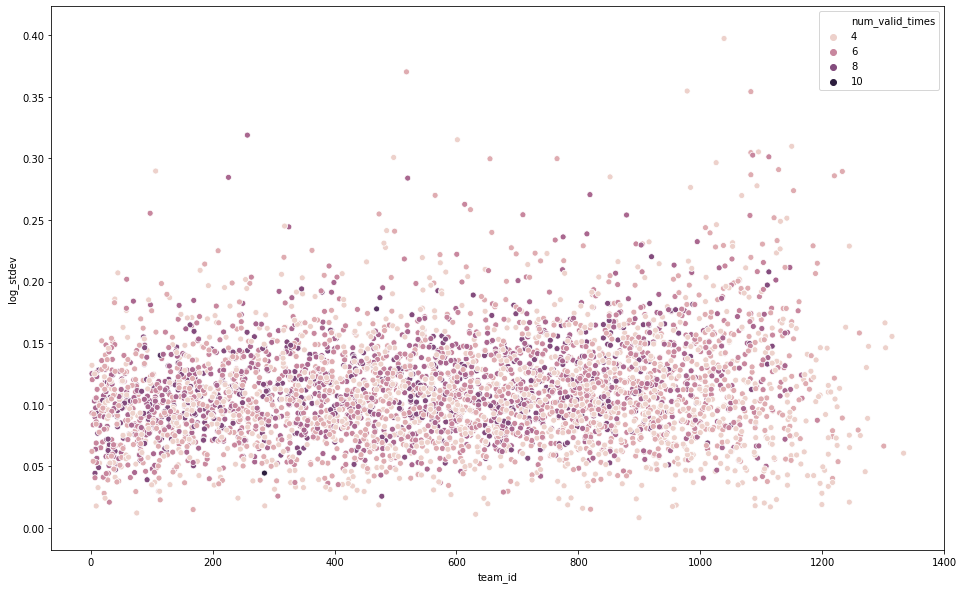

In [17]:
to_plot = history[history["num_valid_times"] > 3]
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 10))
sns.scatterplot(x="team_id", y=to_plot.log_stdev, hue="num_valid_times", data=to_plot)


In [16]:
STOP_HERE my pymc model is not right and takes too much time

SyntaxError: invalid syntax (<ipython-input-16-49b5604c12b7>, line 1)

In [ ]:

#runner_preds = history[np.logical_and(history['teams'].str.contains("RE"), history["num_valid_times"] > 1)] 
runner_preds = history.loc[
    (history['teams'].str.contains("ONS")) & 
    (history["num_valid_times"] >= 1)] 
#runner_preds = history[np.isfinite(history["pace_7"])] 
#runner_preds = history[history["num_valid_times"] >= 1] 

#display(runner_preds[["name", "num_valid_times", "mean_pace", "stdev", "prior_mean", "prior_log_std"]])
##runner_preds runner_preds = history[np.isfinite(history["pace_7"])] 

paces = runner_preds[["pace_1", "pace_2", "pace_3", "pace_4", "pace_5", "pace_6", "pace_7"]]
paces.shape

In [ ]:
runner_preds[["stdev", "log_stdev", "prior_log_std"]].describe(percentiles=[0.05, .25, .5, .75, .95, .99])

In [ ]:
log_stds = runner_preds["prior_log_std"].values
#log_stds = np.clip(runner_preds["prior_log_std"], 0.1, 1.3).values
#log_stds = runner_preds["prior_log_std"].values
np.min(log_stds)

In [ ]:
import multiprocessing
multiprocessing.cpu_count()

In [ ]:
J=np.log(paces).T.shape
display(J)
import pymc3 as pm
with pm.Model() as hierarchial:
    mu = pm.Normal('mu', mu=np.log(runner_preds["prior_mean"]).values, sd=log_stds, shape=J[1])
    # Please fix sigma, 
    sigma = pm.Lognormal('sigma',mu=log_stds, sd=0.35, shape=J[1])
    
    eta = pm.Normal('eta', 0, 1, shape=J)
    tau = pm.HalfCauchy('tau', beta=5,shape=J[1])
    #theta = pm.Normal('theta', mu=mu, sd=tau, shape=J)
    theta = pm.Deterministic('theta', mu + tau*eta)
    obs = pm.Normal('obs', mu=theta, sd=sigma, observed=np.log(paces).T)
    

In [ ]:

with hierarchial:
    nuts_args = {
        "target_accept": 0.9
    }
    short_trace = pm.sample(3000, n_init=3000, tune=5000, random_seed=2019, 
                            cores= multiprocessing.cpu_count() -1, 
                            chains=4,
                            nuts_kwargs=nuts_args)
   

In [ ]:
runner_preds = runner_preds.assign(predicted_log_pace_mean = np.mean(short_trace["mu"], axis=0))
runner_preds = runner_preds.assign(predicted_log_pace_std = np.std(short_trace["mu"], axis=0))
runner_preds = runner_preds.assign(predicted_pace = np.exp(runner_preds.predicted_log_pace_mean))
runner_preds = runner_preds.assign(predicted_pace_std = np.exp(runner_preds.predicted_log_pace_std))
runner_preds = runner_preds.assign(prior_exp_std = np.exp(runner_preds.prior_log_std))
runner_preds = runner_preds.assign(predicted_pace_sigma = np.exp(np.mean(short_trace["sigma"], axis=0)))

# 3.5 is a bit unjustified but we dont want to predict too wide interval
runner_preds["predicted_pace_sigma_fix"] = np.clip(runner_preds["predicted_pace_sigma"], 0.5, 3.5)
runner_preds["pred_pace_error"] = np.abs(runner_preds["predicted_pace"] - runner_preds["mean_pace"])
runner_preds["pred_pace_error_in_sigma"] = runner_preds["pred_pace_error"] / runner_preds["predicted_pace_sigma_fix"]
runner_preds["pred_pace_error_in_std"] = runner_preds["pred_pace_error"] / runner_preds["predicted_pace_std"]


In [ ]:
display(runner_preds[["mean_team_id", "name", "num_valid_times", "mean_pace", "stdev", "prior_mean", "prior_exp_std", 
                "predicted_pace", "pred_pace_error", "predicted_pace_std", "predicted_pace_sigma_fix", "pred_pace_error_in_sigma", "pred_pace_error_in_std"]
                    ][runner_preds['teams'].str.contains("REAK")].round(2))



In [ ]:
cleanned_up_preds = runner_preds[
    ["mean_team_id", "num_valid_times", "mean_pace", "stdev", "prior_mean", "prior_log_std", 
     "predicted_pace", "pred_pace_error", "predicted_log_pace_mean", "predicted_log_pace_std", "name", "teams"]].round(4)
cleanned_up_preds.to_csv(f"data/preds_for_runners_with_history_11062019_{ve_or_ju}.csv", sep='\t')


In [ ]:
display(np.mean(runner_preds['prior_mean_error']))
display(np.mean(runner_preds["predicted_pace_sigma_fix"]))
display(np.mean(runner_preds["pred_pace_error_in_sigma"]))
display(np.mean(runner_preds["predicted_pace_std"]))
display(np.mean(runner_preds["pred_pace_error_in_std"]))
np.mean(runner_preds["pred_pace_error"])

In [ ]:
runner_preds[["predicted_pace_sigma", "predicted_pace_sigma_fix", "pred_pace_error_in_sigma", "predicted_pace_std", "pred_pace_error_in_std", "predicted_log_pace_std"]].describe(percentiles=[0.05, .25, .5, .75, .95, .99])

In [ ]:
runner_preds[
    ['num_valid_times', "mean_pace", "stdev", "prior_mean_error", "prior_exp_std", "prior_mean_error_in_sd", "pred_pace_error", "predicted_pace_sigma_fix", "pred_pace_error_in_sigma", "predicted_pace_std", "pred_pace_error_in_std"]
].groupby('num_valid_times').agg(["median"]).round(2)

In [ ]:
# Disable traceplot for full data batches because it crashes my laptop 
# pm.traceplot(short_trace, var_names=['mu', 'sigma'])

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

%config InlineBackend.figure_format = 'retina'

mu = np.exp(short_trace['mu'])
mmu = [np.mean(mu[:i]) for i in np.arange(1, len(mu))]
plt.figure(figsize=(15, 4))
#plt.axhline(14.383, lw=2.5, color='gray')
plt.plot(mmu, lw=2.5)
#plt.ylim(0, 2)
plt.xlabel('Iteration')
plt.ylabel('MCMC mean of (mu)')
plt.title('MCMC estimation of (mu)');

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

%config InlineBackend.figure_format = 'retina'

sigma = np.exp(short_trace['sigma'])
msigma = [np.mean(sigma[:i]) for i in np.arange(1, len(sigma))]
plt.figure(figsize=(15, 4))
#plt.axhline(14.383, lw=2.5, color='gray')
plt.plot(msigma, lw=2.5)
#plt.ylim(0, 2)
plt.xlabel('Iteration')
plt.ylabel('MCMC mean of (sigma)')
plt.title('MCMC estimation of (sigma)');